### Relevante pakker

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [50]:
df = pd.read_csv("lego_data/Data/lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGOï¿½ Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGOï¿½ Super Marioï¿½,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGOï¿½ Super Marioï¿½,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGOï¿½ Super Marioï¿½,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [ ]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages',  'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

# skriv dette til en ny csv-fil
df2.to_csv("lego_data/Data/lego_cleaned.csv", index = False)


,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,28.0
3,Creative Green Bricks,Classic,60.0,4.99,37.0,36.0
11,Fire Truck,DUPLO,6.0,6.99,3.0,6.0
12,Tow Truck,DUPLO,7.0,6.99,3.0,7.0
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0
...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,622.0
1176,Grand Piano,Ideas,3662.0,349.99,564.0,345.0


### Mer eller mindre relevante kodesnutter

In [52]:
print(df2.mean(numeric_only = True))

Pieces           438.041215
Price             47.082733
Pages            107.005423
Unique_Pieces    135.129067
dtype: float64


In [53]:
print(df2['Theme'].value_counts())

Star Wars            110
Friends              100
City                  94
NINJAGO               78
DUPLO                 51
Marvel                50
Disney                41
Creator 3-in-1        38
Technic               38
BrickHeadz            31
Minecraft             26
THE LEGO MOVIE 2      26
Harry Potter          22
Jurassic World        20
Classic               20
Hidden Side           19
Speed Champions       17
Batman                16
Creator Expert        15
Juniors               12
Ideas                 12
Architecture          11
Trolls World Tour      9
Monkie Kid             9
DC                     9
DOTS                   8
Overwatch              8
LEGO Frozen 2          8
Unikitty               6
Powered UP             4
Xtra                   4
Minifigures            3
Powerpuff Girls        2
Minions                2
Spider-Man             2
Stranger Things        1
Name: Theme, dtype: int64


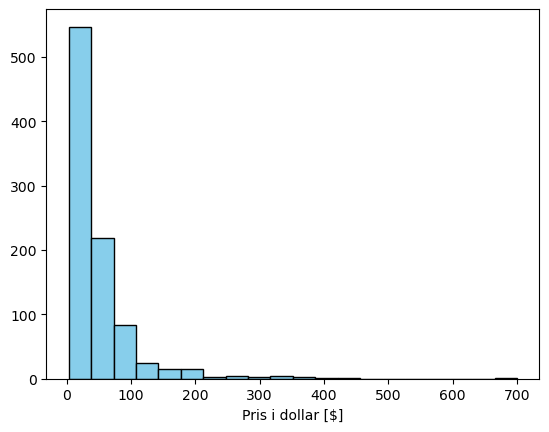

In [54]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

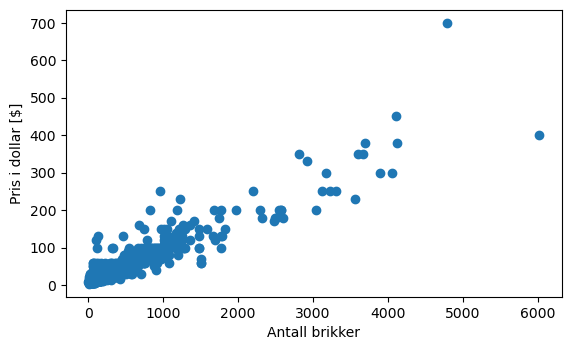

In [55]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [56]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name         Imperial Star Destroyer
Theme                          Star Wars
Pieces                            4784.0
Price                             699.99
Pages                              444.0
Unique_Pieces                      445.0
Name: 825, dtype: object


In [57]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name         Hogwarts Castle
Theme               Harry Potter
Pieces                    6020.0
Price                     399.99
Pages                      636.0
Unique_Pieces              624.0
Name: 821, dtype: object


In [58]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Xtra            3.990000
Minifigures    12.990000
BrickHeadz     13.731935
Name: Price, dtype: float64

In [59]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Stranger Things    2287.0
Powered UP         2113.5
Creator Expert     1958.8
Name: Pieces, dtype: float64

KeyError: 'Unique_Pieces_Ratio'

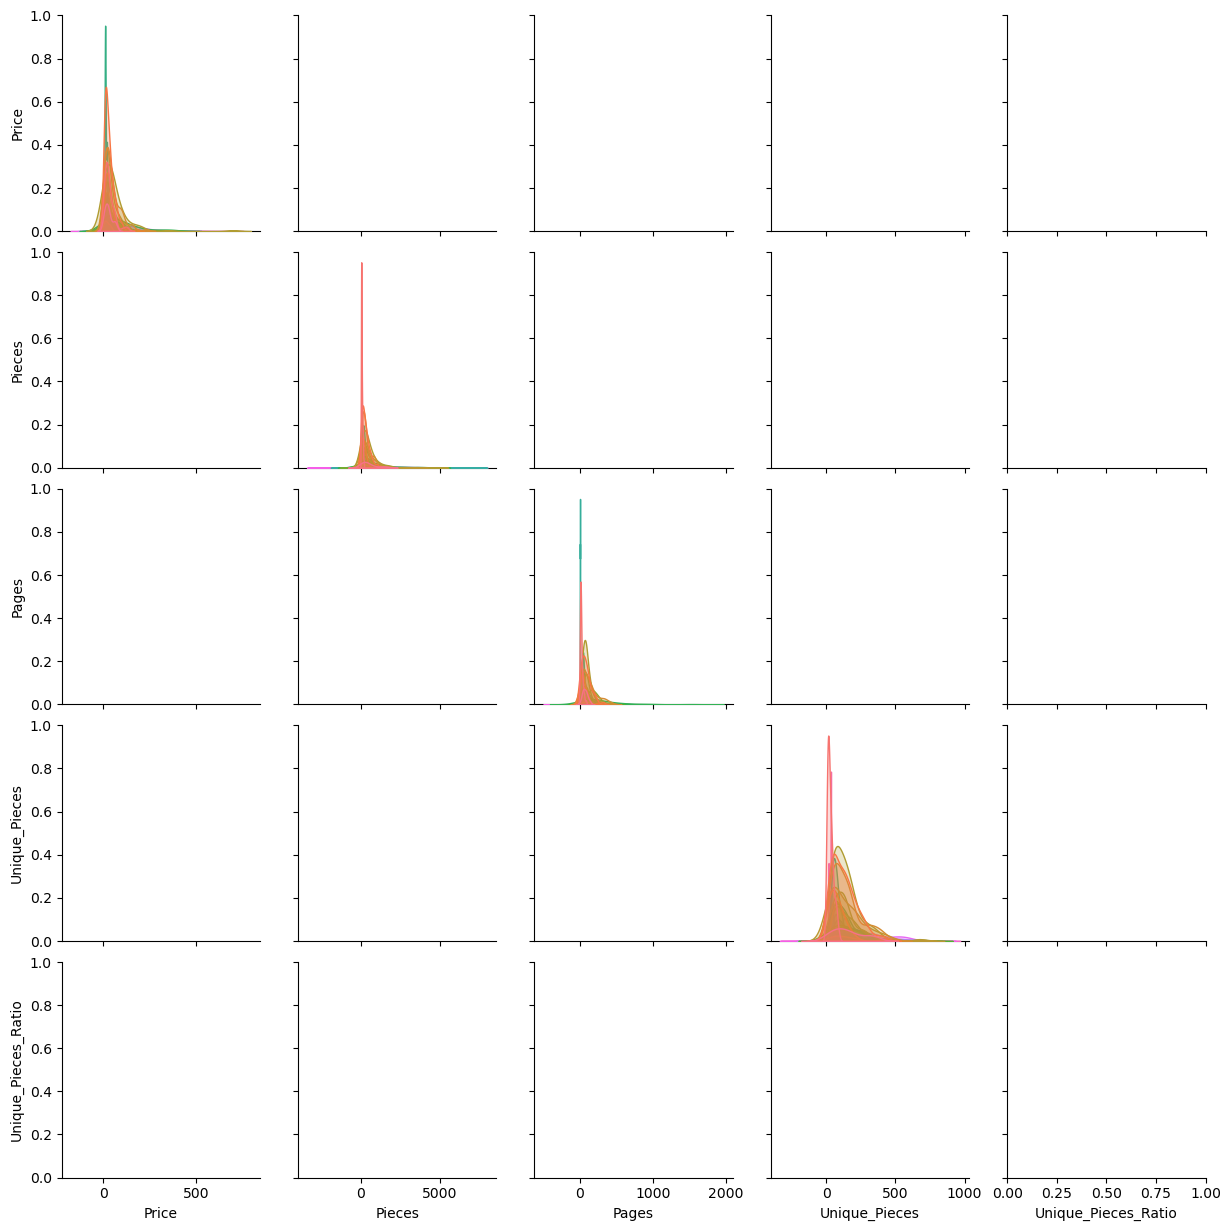

In [60]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Unique_Pieces', 'Unique_Pieces_Ratio'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [ ]:
# enkel lineær regresjon
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     5415.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:19:10   Log-Likelihood:                -4161.6
No. Observations:                 922   AIC:                             8327.
Df Residuals:                     920   BIC:                             8337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8962      0.894      9.951      0.000       7.142      10.651
Pieces         0.0872      0.001     73.589      0.000       0.085       0.090
==============================================================================
Omnibus:                      736.003   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45431.936
Skew:                           3.115   Prob(JB):                         0.00
Kurtosis:                      36.820   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

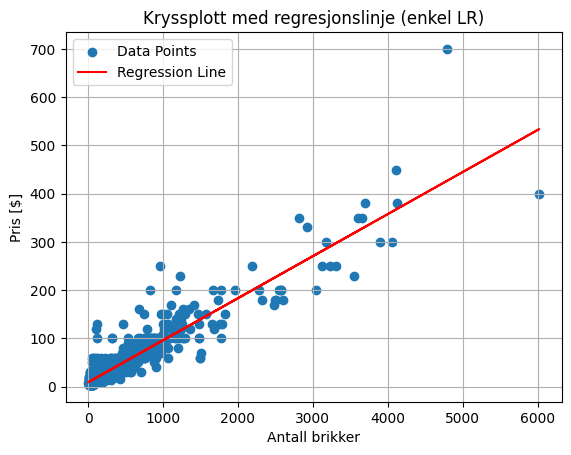

In [ ]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

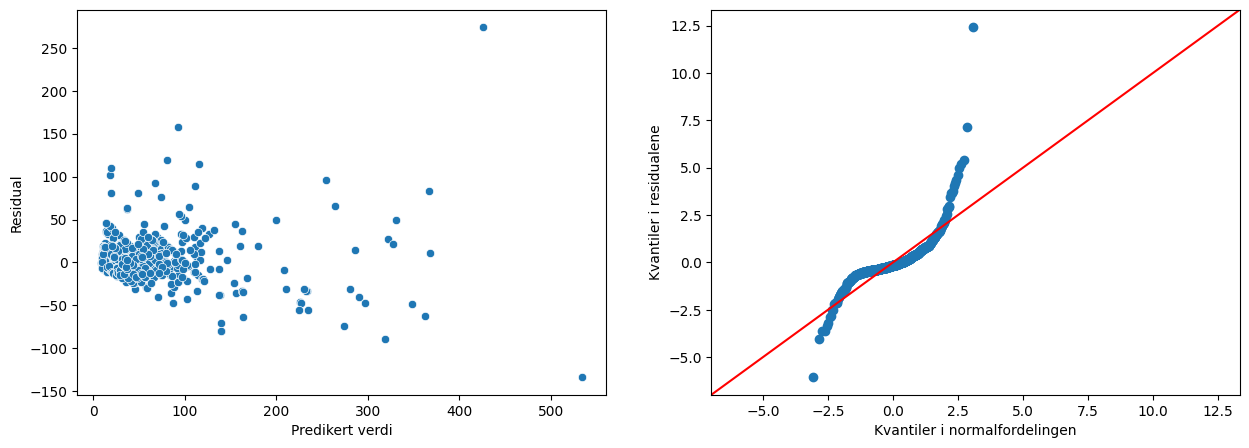

In [ ]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

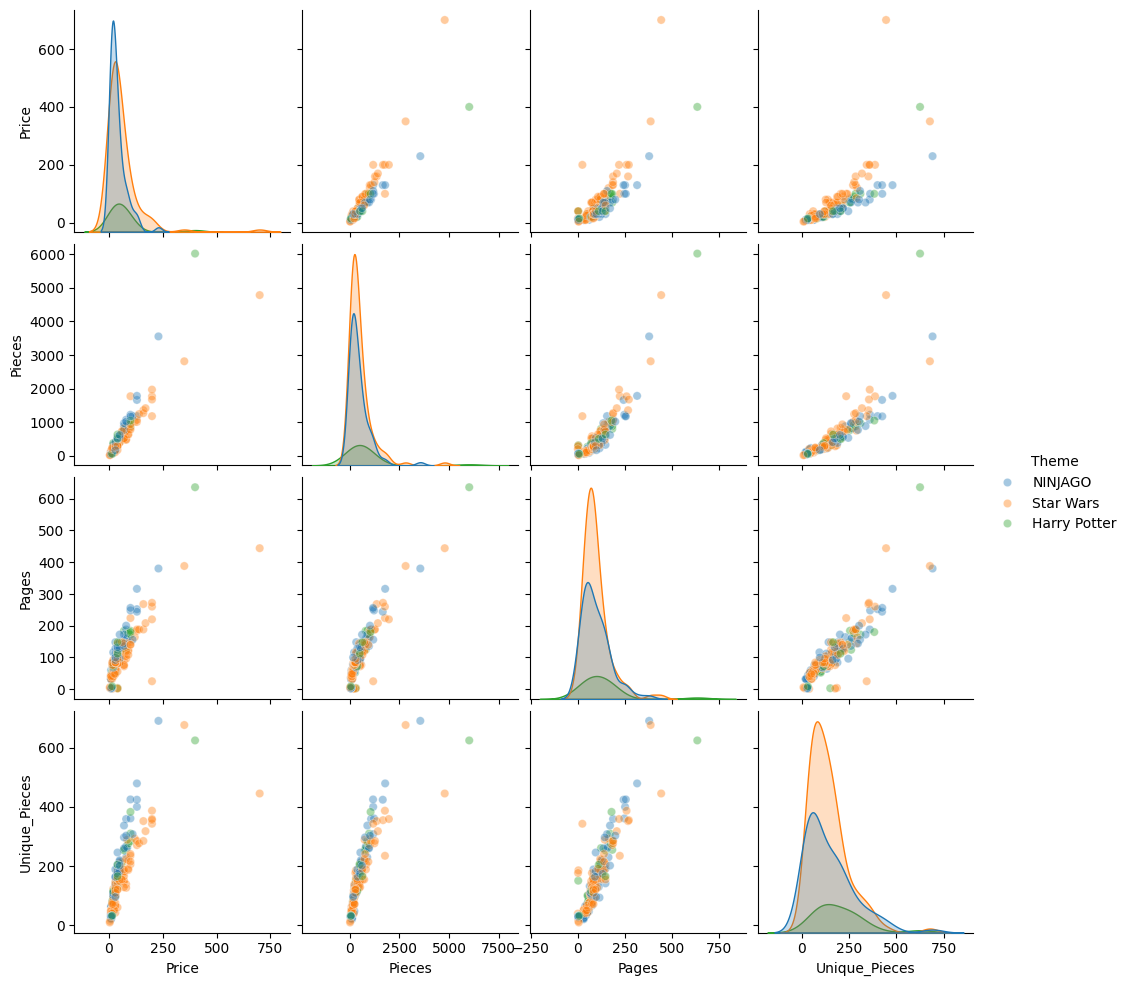

In [ ]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages',  'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [ ]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [ ]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

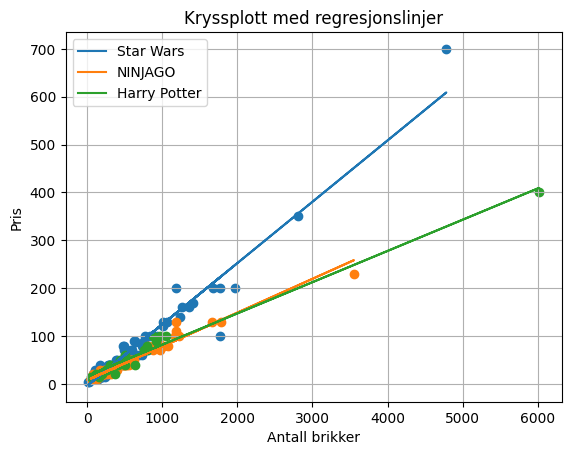

In [ ]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [ ]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Theme' , data = subset_df)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     448.1
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           5.61e-90
Time:                        12:19:11   Log-Likelihood:                -976.53
No. Observations:                 210   AIC:                             1961.
Df Residuals:                     206   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.2531      5.792     -0.907      0.366     -16.673       6.167
Theme[T.NINJAGO]       2.7036      6.225      0.434      0.665      -9.569      14.976
Theme[T.Star Wars]    17.7823      6.009      2.959      0.003       5.934      29.630
Pieces                 0.0946      0.003     36.185      0.000       0.089       0.100
==============================================================================
Omnibus:                      170.947   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16680.355
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      46.423   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     448.1
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           5.61e-90
Time:                        12:19:11   Log-Likelihood:                -976.53
No. Observations:                 210   AIC:                             1961.
Df Residuals:                     206   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           12.5292      2.745      4.564      0.000       7.117      17.942
C(Theme, Treatment("Star Wars"))[T.Harry Potter]   -17.7823      6.009     -2.959      0.003     -29.630      -5.934
C(Theme, Treatment("Star Wars"))[T.NINJAGO]        -15.0787      3.785     -3.984      0.000     -22.541      -7.616
Pieces                                               0.0946      0.003     36.185      0.000       0.089       0.100
==============================================================================
Omnibus:                      170.947   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16680.355
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      46.423   Cond. No.                     2.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

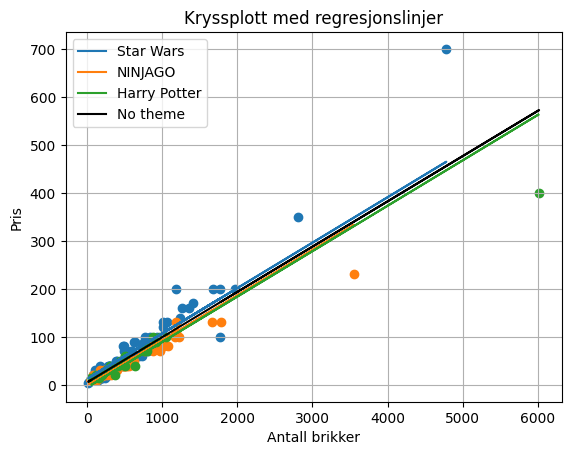

In [ ]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     833.8
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.23e-133
Time:                        12:19:11   Log-Likelihood:                -866.62
No. Observations:                 210   AIC:                             1745.
Df Residuals:                     204   BIC:                             1765.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.8126      3.841      4.378      0.000       9.240      24.385
Theme[T.NINJAGO]             -8.9357      4.441     -2.012      0.046     -17.691      -0.180
Theme[T.Star Wars]          -20.5063      4.257     -4.817      0.000     -28.900     -12.113
Pieces                        0.0652      0.003     23.877      0.000       0.060       0.071
Pieces:Theme[T.NINJAGO]       0.0053      0.004      1.253      0.212      -0.003       0.014
Pieces:Theme[T.Star Wars]     0.0628      0.004     17.512      0.000       0.056       0.070
==============================================================================
Omnibus:                      126.015   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6524.151
Skew:                          -1.494   Prob(JB):                         0.00
Kurtosis:                      30.142   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

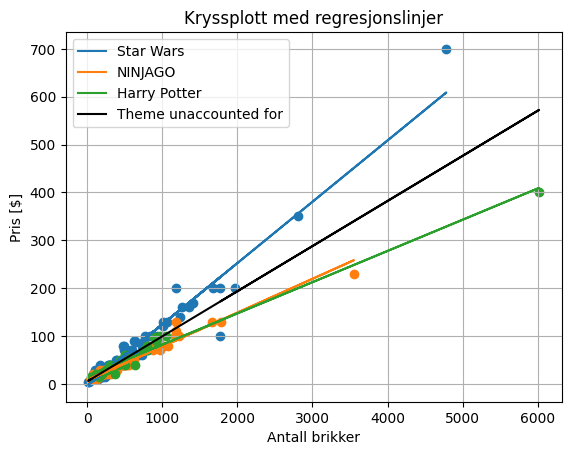

In [ ]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

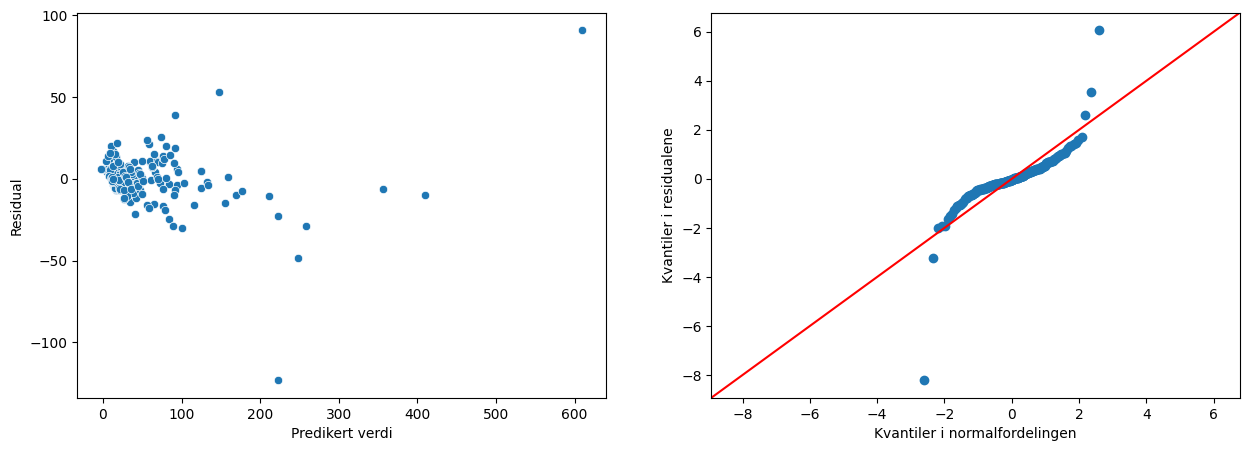

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

,cat,Count
0,Cat1,210
1,Cat2,194
2,Cat3,518


In [ ]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Cat1,Harry Potter,22
1,Cat1,NINJAGO,78
2,Cat1,Star Wars,110
3,Cat2,City,94
4,Cat2,Friends,100
5,Cat3,Architecture,11
6,Cat3,Batman,16
7,Cat3,BrickHeadz,31
8,Cat3,Classic,20
9,Cat3,Creator 3-in-1,38
